## Background: 

I created a [Social Media survey in REDCap](https://redcap.iths.org/surveys/?s=NP4ETD4X98KX3Y8W) that solicits questions about social media use as well as ADHD diagnostic outcomes. The survey is exploring a relationship between ADHD diagnosis seeking and use of TikTok. The TikTok algorithm pushes content into user's FYP that could potentially be an initial connnection with ADHD symptoms for many users. Relating or engaging with this content could push more additional content resulting in questions about one's own status as having clinical ADHD. 

## Step 1: Clean my data using EDA techniques
The first thing we need to have in mind when exploring data is why we are doing it. There are multiple reasons to explore a dataset, the main ones usually being:

understanding your data before building an ML model
analysis to uncover interesting patterns
sheer curiosity
Depending on your goal, the analysis can take slightly different forms, but the basic structure I use is this:

- Loading libraries and data
- Reading data documentation
- Univariate data analysis
- Bivariate data analysis
- Multivariate data analysis
- Insights and next steps

In [16]:
# Loading libraries and data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# load data 
df = pd.read_csv('/Users/jennyskytta/Downloads/SocialMediaSurvey_recode.csv', sep=',')

# look at the shape of data 
print(df.shape)
# check the top of the data 
df.head()

(35, 29)


,Record ID,Survey Timestamp,use_any_social,Washington_State,Instagram,Snapchat,Twitter,BeReal,TikTok,Facebook,...,self_dx,age_dx,dx_lic,dx_provider,led_to_dx,without_wouldyou,rx_for_dx,rx_provider,led_to_rx,Complete?
0,1,4/26/23 16:49,Yes,Yes,yes,yes,yes,no,yes,yes,...,Yes,28.0,Yes,Telehealth with provider - location unknown,Web search of symptoms or experience,Yes,Yes,Via Telehealth with local provider,Web search of symptoms or experience,Complete
1,2,4/26/23 16:43,Yes,Yes,yes,no,yes,no,no,no,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
2,3,NaN,NaN,NaN,no,no,no,no,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
3,4,4/26/23 18:32,Yes,Yes,yes,no,no,no,no,no,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
4,5,4/26/23 20:38,Yes,No,yes,no,yes,no,yes,yes,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete


In [86]:
# convert yes / no to 1 and 0 
df = df.replace(to_replace = "Yes", value = 1)
df = df.replace(to_replace = "no", value = 0)
df = df.replace(to_replace = "yes", value = 1)

In [88]:
# Specify the columns you want to convert
columns_to_convert = ['use_any_social', 'AvgHrsDay', 'believeADHD', 'age_dx', 'dx_lic']

In [ ]:
# Create a dictionary with the desired data type for the selected columns
dtype_dict = {col: 'int64' for col in columns_to_convert}
df = df.astype(dtype_dict)

In [77]:
df.head()

,Record ID,Survey Timestamp,use_any_social,Washington_State,Instagram,Snapchat,Twitter,BeReal,TikTok,Facebook,...,self_dx,age_dx,dx_lic,dx_provider,led_to_dx,without_wouldyou,rx_for_dx,rx_provider,led_to_rx,Complete?
0,1,4/26/23 16:49,1.0,1,1,1,1,0,1,1,...,1,28.0,1.0,Telehealth with provider - location unknown,Web search of symptoms or experience,1,1,Via Telehealth with local provider,Web search of symptoms or experience,Complete
1,2,4/26/23 16:43,1.0,1,1,0,1,0,0,0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
2,3,NaN,NaN,NaN,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
3,4,4/26/23 18:32,1.0,1,1,0,0,0,0,0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
4,5,4/26/23 20:38,1.0,No,1,0,1,0,1,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete


In [72]:
#Datatypes

df.dtypes

Record ID                int64
Survey Timestamp        object
use_any_social         float64
Washington_State        object
Instagram                int64
Snapchat                 int64
Twitter                  int64
BeReal                   int64
TikTok                   int64
Facebook                 int64
Nonelisted               int64
NotOnAny                 int64
SocMedMostUsed          object
AvgHrsDay              float64
Age                     object
ADHDinFYP               object
ADHDcontentsupports     object
believeADHD            float64
dxADHD                  object
self_dx                 object
age_dx                 float64
dx_lic                 float64
dx_provider             object
led_to_dx               object
without_wouldyou        object
rx_for_dx               object
rx_provider             object
led_to_rx               object
Complete?               object
dtype: object

<AxesSubplot:>

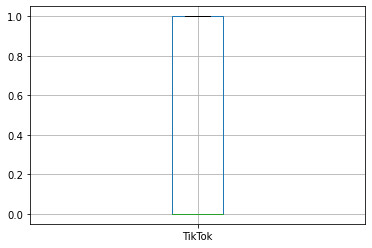

In [66]:
#Boxplot

df[['TikTok']].boxplot()

In [67]:
#Correlation 

df.corr()

,Record ID,use_any_social,Instagram,Snapchat,Twitter,BeReal,TikTok,Facebook,Nonelisted,NotOnAny,AvgHrsDay,believeADHD,age_dx,dx_lic
Record ID,1.000000,NaN,0.310694,0.198030,0.097183,0.291043,0.199065,-0.108616,NaN,NaN,0.148845,NaN,-0.361080,NaN
use_any_social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Instagram,0.310694,NaN,1.000000,0.294174,0.377426,0.240192,0.316973,0.150970,NaN,NaN,-0.002261,NaN,-0.069421,NaN
Snapchat,0.198030,NaN,0.294174,1.000000,0.144338,0.204124,0.206959,0.144338,NaN,NaN,-0.071768,NaN,0.021608,NaN
Twitter,0.097183,NaN,0.377426,0.144338,1.000000,0.306413,0.409673,0.166667,NaN,NaN,-0.057635,NaN,-0.358992,NaN
BeReal,0.291043,NaN,0.240192,0.204124,0.306413,1.000000,0.024140,0.023570,NaN,NaN,0.195892,NaN,-0.775879,NaN
TikTok,0.199065,NaN,0.316973,0.206959,0.409673,0.024140,1.000000,0.307255,NaN,NaN,-0.303179,NaN,-0.521684,NaN
Facebook,-0.108616,NaN,0.150970,0.144338,0.166667,0.023570,0.307255,1.000000,NaN,NaN,-0.004075,NaN,-0.077172,NaN
Nonelisted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NotOnAny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

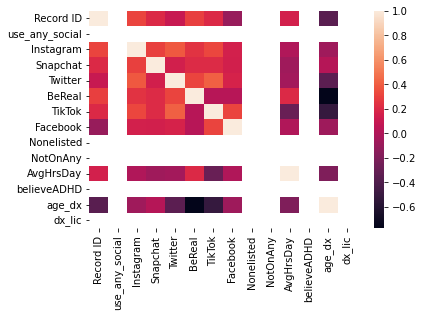

In [90]:
#Correlation plot

sns.heatmap(df.corr())

In [35]:
# The df.info() function will give us the basic information about the dataset. 
#For any data, it is good to start by knowing its information. 
#Let’s see how it works with our data.
df.info

<bound method DataFrame.info of     Record ID  Survey Identifier Survey Timestamp use_any_social  \
0           1                NaN    4/26/23 16:49            Yes   
1           2                NaN    4/26/23 16:43            Yes   
2           3                NaN              NaN            NaN   
3           4                NaN    4/26/23 18:32            Yes   
4           5                NaN    4/26/23 20:38            Yes   
5           6                NaN    4/26/23 21:10            Yes   
6           7                NaN    4/26/23 21:14            Yes   
7           8                NaN    4/26/23 21:28            Yes   
8           9                NaN    4/26/23 21:30            Yes   
9          10                NaN    4/26/23 21:35            Yes   
10         11                NaN              NaN            NaN   
11         12                NaN    4/26/23 22:11            Yes   
12         13                NaN    4/26/23 23:50            Yes   
13         14   

In [36]:
# describe() provides descriptive statistics of the data 
df.describe()

,Record ID,Survey Identifier,Instagram,Snapchat,Twitter,BeReal,TikTok,Facebook,Nonelisted,NotOnAny,AvgHrsDay,age_dx
count,35.000000,0.0,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.0,35.0,30.000000,9.000000
mean,18.000000,NaN,0.742857,0.20000,0.428571,0.142857,0.371429,0.571429,0.0,0.0,2.733333,25.111111
std,10.246951,NaN,0.443440,0.40584,0.502096,0.355036,0.490241,0.502096,0.0,0.0,2.941186,10.203485
min,1.000000,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.500000,4.000000
25%,9.500000,NaN,0.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,23.000000
50%,18.000000,NaN,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,2.000000,26.000000
75%,26.500000,NaN,1.000000,0.00000,1.000000,0.000000,1.000000,1.000000,0.0,0.0,3.000000,27.000000
max,35.000000,NaN,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,15.000000,44.000000


## Missing and Null Values Cleaning 

In [42]:
#Find null values

df.isnull().sum()

Record ID               0
Survey Timestamp        5
use_any_social          5
Washington_State        5
Instagram               0
Snapchat                0
Twitter                 0
BeReal                  0
TikTok                  0
Facebook                0
Nonelisted              0
NotOnAny                0
SocMedMostUsed          0
AvgHrsDay               5
Age                     5
ADHDinFYP              22
ADHDcontentsupports    23
believeADHD            25
dxADHD                  5
self_dx                 7
age_dx                 26
dx_lic                 26
dx_provider            26
led_to_dx              26
without_wouldyou       26
rx_for_dx              26
rx_provider            28
led_to_rx              28
Complete?               0
dtype: int64

In [ ]:
# null data displayed as percentages 
df.isnull().sum()/len(df)

In [47]:
# show columsn with highest percentage of missing data first 
df.isnull().sum().sort_values(ascending = False)/len(df)

led_to_rx              0.800000
rx_provider            0.800000
dx_provider            0.742857
led_to_dx              0.742857
age_dx                 0.742857
dx_lic                 0.742857
rx_for_dx              0.742857
without_wouldyou       0.742857
believeADHD            0.714286
ADHDcontentsupports    0.657143
ADHDinFYP              0.628571
self_dx                0.200000
dxADHD                 0.142857
Washington_State       0.142857
use_any_social         0.142857
AvgHrsDay              0.142857
Survey Timestamp       0.142857
Age                    0.142857
Record ID              0.000000
SocMedMostUsed         0.000000
NotOnAny               0.000000
Nonelisted             0.000000
Facebook               0.000000
TikTok                 0.000000
BeReal                 0.000000
Twitter                0.000000
Snapchat               0.000000
Instagram              0.000000
Complete?              0.000000
dtype: float64

## Data Cleaning

In [ ]:
df['Street Number'] = df['Street Number'].replace(0, np.nan)

In [27]:
#Replace null values

df.replace(np.nan,'0',inplace = True)

#Check the changes now
df.isnull().sum()

Record ID              0
Survey Identifier      0
Survey Timestamp       0
use_any_social         0
Washington_State       0
Instagram              0
Snapchat               0
Twitter                0
BeReal                 0
TikTok                 0
Facebook               0
Nonelisted             0
NotOnAny               0
SocMedMostUsed         0
AvgHrsDay              0
Age                    0
ADHDinFYP              0
ADHDcontentsupports    0
believeADHD            0
dxADHD                 0
self_dx                0
age_dx                 0
dx_lic                 0
dx_provider            0
led_to_dx              0
without_wouldyou       0
rx_for_dx              0
rx_provider            0
led_to_rx              0
Complete?              0
dtype: int64

In [25]:
# Missing values
df.isna().sum()

Record ID               0
Survey Identifier      35
Survey Timestamp        5
use_any_social          5
Washington_State        5
Instagram               0
Snapchat                0
Twitter                 0
BeReal                  0
TikTok                  0
Facebook                0
Nonelisted              0
NotOnAny                0
SocMedMostUsed          0
AvgHrsDay               5
Age                     5
ADHDinFYP              22
ADHDcontentsupports    23
believeADHD            25
dxADHD                  5
self_dx                 7
age_dx                 26
dx_lic                 26
dx_provider            26
led_to_dx              26
without_wouldyou       26
rx_for_dx              26
rx_provider            28
led_to_rx              28
Complete?               0
dtype: int64

In [28]:
#Find the duplicates

df.duplicated().sum()

0

In [ ]:
#unique values

df['rowname2'].unique()

df['rowname3'].unique()

df['rowname4'].unique()

In [ ]:
#Plot the unique values

sns.countplot(df['rowname2']).unique()

In [7]:
df.columns

Index(['Record ID', 'Survey Identifier', 'Survey Timestamp',
       'The following survey has been created by students enrolled in the Masters of Information Management IMT 570 course at the University of Washington. (https://ischool.uw.edu/programs/msim)  The survey was created as part of a project examining social media use and diagnosis of a health condition. You may have received this link while engaging on a social media platform or by being sent the link directly from someone you know.    The survey asks questions which might involve personal or sensitive information. No identifiable information is being collected and all answers will be completely anonymous. There are no additional follow up requirements.  This is a single survey.    Data collected will be analyzed to examine associations between a health condition and social media use. No information or data from this survey will be published or shared outside of the scope of the course (IMT 570: Data Driven Organizational Prob

In [ ]:
df.rowname 